<a href="https://colab.research.google.com/github/YerinS/Yerin_Portfolio/blob/main/DL_AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [DL LSTM] Apple Inc. Stock Price Prediction


- 　__Data__ 　　　　　　　historical data of APPLE INC. stock (AAPL)<br/>
- 　__Features__ 　　　　　date, open, high, low, close, adj close<br/>
- 　__Validation MSE__　　 0.0035<br/>
- 　__Data Source__ 　 　　 Kaggle<br/>
- 　__DL Framework__ 　 　 Keras<br/>
- 　__Packages__　 　 　 　TensorFlow v2.7, NumPy, Matplotlib<br/>
<br/>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings("ignore")

# 1. Get Data

- Download data from https://www.kaggle.com/datasets/varpit94/apple-stock-data-updated-till-22jun2021

In [2]:
from google.colab import files
file = files.upload()

Saving AAPL.csv to AAPL.csv


In [41]:
data = np.loadtxt('AAPL.csv', delimiter=",", skiprows=1, usecols=(1, 2, 3, 4, 5, 6))

# 2. Clean, Prepare & Manipulate Data

- Normalize and split data

In [42]:
data = data - np.min(data, axis=0) + 0.0001
data = data / np.max(data, axis=0)
train_data = data[:int(len(data)*0.95)]
test_data = data[int(len(data)*0.95):]

- Slide window

In [43]:
def windowing(array, window_size):
  X = []
  Y = []

  for i in range(len(array)-window_size*2):
    X.append(array[i:i+window_size])
    Y.append(array[i+window_size:i + window_size*2])

  return np.asarray(X), np.asarray(Y)

In [44]:
window_size = 14

train_X, train_Y = windowing(train_data, window_size)
test_X, test_Y = windowing(test_data, window_size)

In [45]:
train_Y = train_Y[:, :, :-1]
test_Y = test_Y[:, :, :-1]

In [46]:
print("Training X Size : " + str(train_X.shape))
print("Training Y Size : " + str(train_Y.shape))
print("Test X Size : " + str(test_X.shape))
print("Test Y Size : " + str(test_Y.shape))

Training X Size : (9860, 14, 6)
Training Y Size : (9860, 14, 5)
Test X Size : (493, 14, 6)
Test Y Size : (493, 14, 5)


# 3. Train Model

- Create neural network model using Keras

In [47]:
model = keras.Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(rate=0.8),
    keras.layers.Dense(5)
])

In [48]:
model.compile(optimizer="adam", loss="mae", metrics=["mse"])

In [49]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(train_X, train_Y, epochs=50,
                    validation_data=(test_X, test_Y),
                    callbacks=[early_stop])

Epoch 1/50
309/309 [==============================] - 14s 29ms/step - loss: 0.0173 - mse: 0.0018 - val_loss: 0.2116 - val_mse: 0.0525
Epoch 2/50
309/309 [==============================] - 8s 26ms/step - loss: 0.0135 - mse: 0.0011 - val_loss: 0.1804 - val_mse: 0.0387
Epoch 3/50
309/309 [==============================] - 9s 28ms/step - loss: 0.0130 - mse: 0.0010 - val_loss: 0.1790 - val_mse: 0.0378
Epoch 4/50
309/309 [==============================] - 9s 28ms/step - loss: 0.0129 - mse: 0.0010 - val_loss: 0.1470 - val_mse: 0.0257
Epoch 5/50
309/309 [==============================] - 9s 29ms/step - loss: 0.0127 - mse: 9.9749e-04 - val_loss: 0.1009 - val_mse: 0.0128
Epoch 6/50
309/309 [==============================] - 8s 26ms/step - loss: 0.0126 - mse: 9.9576e-04 - val_loss: 0.1447 - val_mse: 0.0243
Epoch 7/50
309/309 [==============================] - 8s 27ms/step - loss: 0.0125 - mse: 9.7187e-04 - val_loss: 0.1160 - val_mse: 0.0162
Epoch 8/50
309/309 [==============================] - 9s

- Visualize model

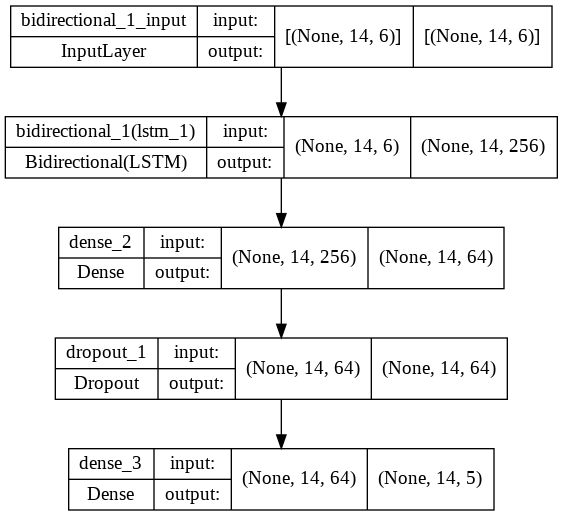

In [50]:
plot_model(model, show_shapes=True)

# 4. Evaluate Model 

- Visualize accuracy and loss history

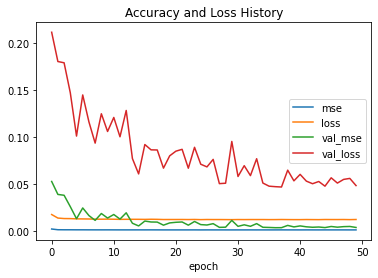

In [52]:
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_mse'], label='val_mse')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Accuracy and Loss History')
plt.xlabel('epoch')
plt.legend(loc='center right')
plt.show()

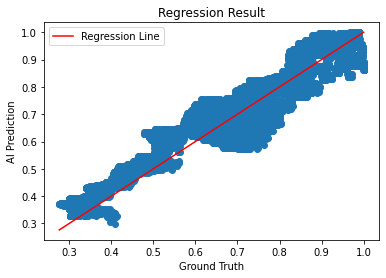

In [53]:
X = model(test_X) / np.max(model(test_X), axis=0)
Y = test_Y / np.max(test_Y, axis=0)

minval = min(np.min(X), np.min(Y))
maxval = max(np.max(X), np.max(Y))

plt.title("Regression Result")
plt.xlabel("Ground Truth")
plt.ylabel("AI Prediction")
plt.scatter(X, Y)
plt.plot([minval, maxval], [minval, maxval], "red", label='Regression Line') 
plt.legend()